## 0. Get data
To run the code behind, the data location is in: 
* Modeling_Semantic_Plausibility/Data/pap, 
* Modeling_Semantic_Plausibility/Data/pep-3k

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
from data_wrong_analysis import DataAnalysis_wrong, Abstractness_wrong

In [2]:
with open('pap_preds_filter1.txt', 'r') as f:
    pap_preds = eval(f.read())

pap_list_wrong = []

for i in pap_preds:
    if pap_preds[i]['preds'] != pap_preds[i]['original_labels']:
        pap_temp = []
        pap_temp.append(str(pap_preds[i]['original_labels']))
        pap_temp.append(i)
        pap_list_wrong.append(pap_temp)
for i in pap_list_wrong:
    print(i)
    break
for i in pap_list_wrong:
    print(i[1]) 

['0', 'dollar receives sheet']
dollar receives sheet
princess awakens desire
couple finds cockroach
improvement improves toolbox
letter asserts antiquity
kangaroo assists roommate
elephant bounces tip
city lives period
newspaper mentions quality
group makes barrel
lawn inhibits cockroach
ceremony distributes book
bank cuts link
army rediscovers shotgun
fortitude bolsters reputation
choice treats water
memory improves fitness
descriptor finds forest
newspaper stimulates tradition
mule contains tradition
attendee disengages norm
guest watches detonation
ratio outnumbers name
dolphin poses snout
philosopher compares convenience
method considers manifestation


In [3]:
with open('pap_preds_filter.txt', 'r') as f:
    pap_preds2 = eval(f.read())

pap_list_wrong2 = []

for i in pap_preds2:
    if pap_preds2[i]['preds'] != pap_preds2[i]['original_labels']:
        pap_temp = []
        pap_temp.append(str(pap_preds2[i]['original_labels']))
        pap_temp.append(i)
        pap_list_wrong2.append(pap_temp)
print(pap_list_wrong2)
for i in pap_list_wrong2:
    print(i[1]) 

[['1', 'growth implies ground'], ['0', 'couple finds cockroach'], ['1', 'memory improves fitness'], ['1', 'casualty comprises man'], ['1', 'dolphin poses snout'], ['1', 'elephant bounces tip'], ['1', 'philosopher compares convenience'], ['1', 'bank cuts link'], ['1', 'improvement improves toolbox'], ['1', 'princess awakens desire'], ['1', 'army rediscovers shotgun'], ['1', 'fortitude bolsters reputation'], ['1', 'ratio outnumbers name'], ['1', 'kangaroo assists roommate'], ['1', 'newspaper stimulates tradition'], ['1', 'descriptor finds forest'], ['1', 'host passes ticket'], ['1', 'lawn inhibits cockroach'], ['1', 'attendee disengages norm'], ['1', 'guest watches detonation'], ['1', 'property characterizes bearer'], ['1', 'development initiates building'], ['1', 'man retrieves identification']]
growth implies ground
couple finds cockroach
memory improves fitness
casualty comprises man
dolphin poses snout
elephant bounces tip
philosopher compares convenience
bank cuts link
improvement i

## 1. basic analysis

In [4]:
data_set_pap=DataAnalysis_wrong(pap_list_wrong)
data_set_pep=DataAnalysis_wrong(pap_list_wrong2)

In [5]:
print('pap:number of rows and columns, number of classes')
print('pap:',data_set_pap.dataset_statistics,data_set_pap.classes_num)
print('pep:',data_set_pep.dataset_statistics, data_set_pep.classes_num)

pap:number of rows and columns, number of classes
pap: [26, 2] {'0': 5, '1': 21}
pep: [23, 2] {'0': 1, '1': 22}


# 2. tokens analysis (word counts)

## 2.1 tokens number

In [6]:
print('pap:total_tokens, num_unique_tokens')
print('pap:',len(data_set_pap.all_tokens),data_set_pap.num_unique_tokens)
print('pep:',len(data_set_pep.all_tokens),data_set_pep.num_unique_tokens)

pap:total_tokens, num_unique_tokens
pap: 78 73
pep: 69 65


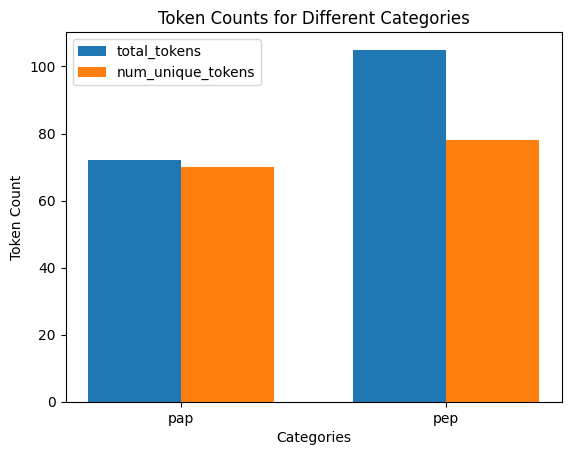

In [7]:
import matplotlib.pyplot as plt

# 数据
categories = ['pap', 'pep']
total_tokens = [72, 105]
num_unique_tokens = [70, 78]

# 创建柱状图
bar_width = 0.35
index = range(len(categories))

fig, ax = plt.subplots()
bar1 = ax.bar(index, total_tokens, bar_width, label='total_tokens')
bar2 = ax.bar([i + bar_width for i in index], num_unique_tokens, bar_width, label='num_unique_tokens')

# 添加标签、标题和图例
ax.set_xlabel('Categories')
ax.set_ylabel('Token Count')
ax.set_title('Token Counts for Different Categories')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(categories)
ax.legend()

# 显示图形
plt.show()


pap:number of token pairs


/home/linux1/BOX/modeling23/pap_Analysis_and_Model/Models/llama2_binary_classification/result_analysis/data_wrong_analysis.py:132: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0].set_xticklabels(top_5_s_v.keys(), rotation=45, ha='right')
/home/linux1/BOX/modeling23/pap_Analysis_and_Model/Models/llama2_binary_classification/result_analysis/data_wrong_analysis.py:138: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1].set_xticklabels(top_5_v_o.keys(), rotation=45, ha='right')


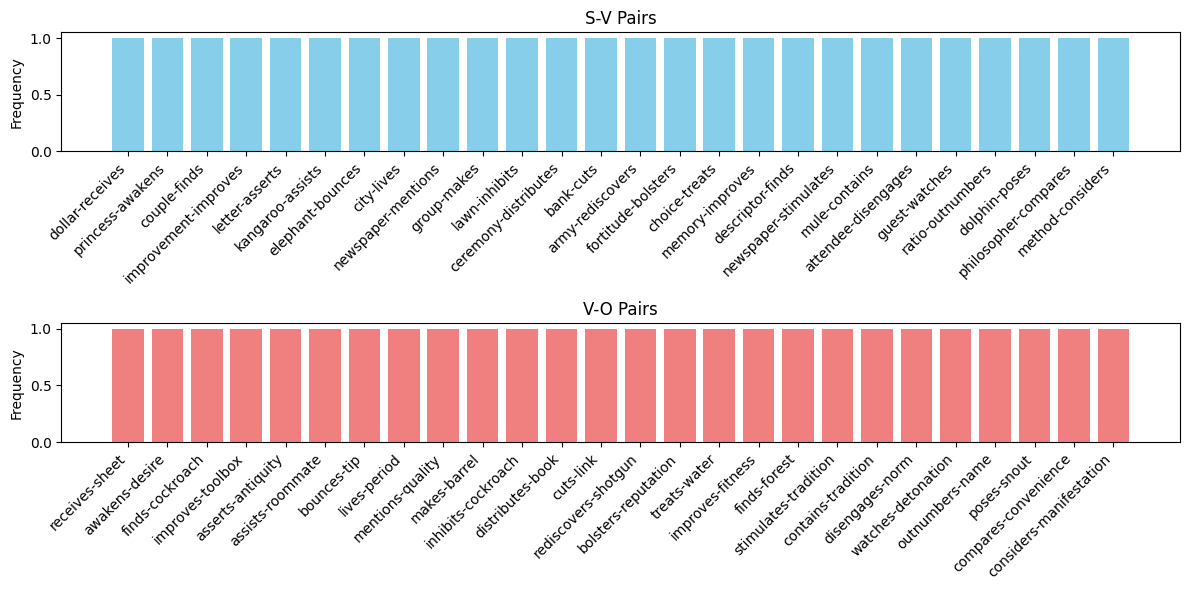

pep3k:number of token pairs


/home/linux1/BOX/modeling23/pap_Analysis_and_Model/Models/llama2_binary_classification/result_analysis/data_wrong_analysis.py:132: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0].set_xticklabels(top_5_s_v.keys(), rotation=45, ha='right')
/home/linux1/BOX/modeling23/pap_Analysis_and_Model/Models/llama2_binary_classification/result_analysis/data_wrong_analysis.py:138: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1].set_xticklabels(top_5_v_o.keys(), rotation=45, ha='right')


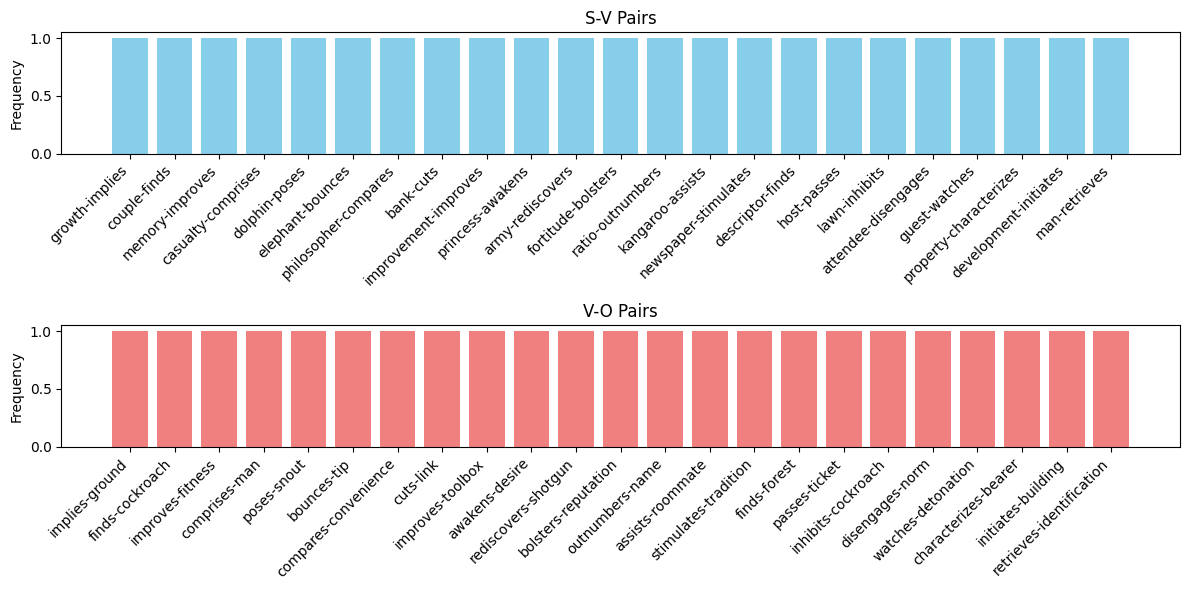

In [8]:
print('pap:number of token pairs')
data_set_pap.plot_tokens_bi_distribution(50)
print('pep3k:number of token pairs')
data_set_pep.plot_tokens_bi_distribution(50)

# 3.POS analysis

## 3.1 unigram pos

In [9]:
print('pap:unique_pos')
print(len(data_set_pap.unique_pos)) #18
print('pep_3k:unique_pos')
print(len(data_set_pep.unique_pos)) #17


pap:unique_pos
6
pep_3k:unique_pos
6


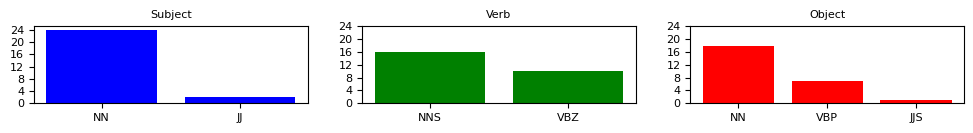

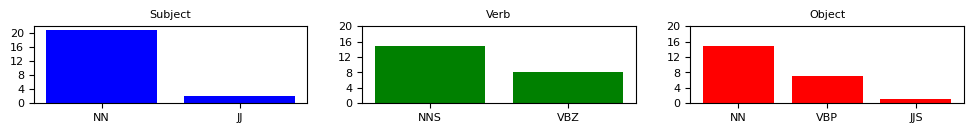

In [10]:
data_set_pap.plot_pos_uni_distribution()
data_set_pep.plot_pos_uni_distribution()

## 3.2 bigram pos

In [11]:
pos1=data_set_pap.pos_bigrams_counts
pos2=data_set_pep.pos_bigrams_counts

In [12]:
print(pos1)
print(pos2)

{'NN NNS': 14, 'NN VBZ': 10, 'NNS NN': 9, 'VBZ NN': 9, 'NNS VBP': 7, 'JJ NNS': 2, 'VBZ JJS': 1}
{'NN NNS': 13, 'NNS NN': 8, 'NN VBZ': 8, 'VBZ NN': 7, 'NNS VBP': 7, 'JJ NNS': 2, 'VBZ JJS': 1}


## 4. abstractness  
Highly abstract a,  mid-range m, highly concrete c. 

In [13]:
current_dir =os.path.realpath(".")
parent_dir = os.path.abspath(os.path.join(current_dir, os.pardir))
parent_dir = os.path.abspath(os.path.join(parent_dir, os.pardir))
parent_dir = os.path.abspath(os.path.join(parent_dir, os.pardir))
parent_dir = os.path.abspath(os.path.join(parent_dir, os.pardir))
filepath=os.path.abspath(os.path.join(parent_dir,'Data/pap/raw-annotations/dataset.tsv'))
print(filepath)

complete_data = []
with open(filepath, encoding="utf8") as f:
    for lines in f:
        line = lines.strip("\n").split('\t')[:3]
        line.append(lines.strip("\n").split('\t')[6])
        complete_data.append(line)
print(complete_data[1:])

/home/linux1/BOX/modeling23/Data/pap/raw-annotations/dataset.tsv
[['ability means mobility', 'plausible', 'a-m-a', '1'], ['ability permits multiplication', 'plausible', 'a-c-m', '1'], ['access diminishes power', 'plausible', 'a-m-a', '1'], ['achievement reaches community', 'plausible', 'a-c-m', '1'], ['acquisition casts glance', 'plausible', 'a-c-m', '1'], ['action catches interest', 'plausible', 'a-c-a', '1'], ['advance decreases time', 'plausible', 'a-m-m', '1'], ['advance guarantees freedom', 'plausible', 'a-a-a', 'unsure'], ['advantage leads state', 'plausible', 'a-c-m', '1'], ['advantage outweighs risk', 'plausible', 'a-m-a', '1'], ['affiliate fills schedule', 'plausible', 'a-c-m', 'unsure'], ['agency identifies variety', 'plausible', 'm-m-a', '1'], ['agent seizes phone', 'plausible', 'm-c-c', '1'], ['agreement turns descendant', 'plausible', 'a-c-m', '1'], ['airline starts operation', 'plausible', 'm-m-m', '1'], ['airport handles user', 'plausible', 'c-c-m', 'unsure'], ['airport 

In [14]:
pap_text_list=[data_set_pap.file_content[i][1] for i in range(len(data_set_pap.file_content))]
print(pap_text_list)

pap_content=[]
for i in range(len(complete_data[1:])):
    if complete_data[i][0] in pap_text_list:
        temp=[]
        temp.append(complete_data[i][0])
        temp.append(complete_data[i][1])
        temp.append(complete_data[i][2])
        temp.append(complete_data[i][3])
        pap_content.append(temp)

pap_ab=Abstractness_wrong(pap_content)
for i in pap_ab.content:
    print(i)

['dollar receives sheet', 'princess awakens desire', 'couple finds cockroach', 'improvement improves toolbox', 'letter asserts antiquity', 'kangaroo assists roommate', 'elephant bounces tip', 'city lives period', 'newspaper mentions quality', 'group makes barrel', 'lawn inhibits cockroach', 'ceremony distributes book', 'bank cuts link', 'army rediscovers shotgun', 'fortitude bolsters reputation', 'choice treats water', 'memory improves fitness', 'descriptor finds forest', 'newspaper stimulates tradition', 'mule contains tradition', 'attendee disengages norm', 'guest watches detonation', 'ratio outnumbers name', 'dolphin poses snout', 'philosopher compares convenience', 'method considers manifestation']
get all data abstractness tag
get all data abstractness tag
get all data abstractness tag
get all data abstractness tag
['army rediscovers shotgun', 'plausible', 'c-a-c', '1']
['attendee disengages norm', 'plausible', 'm-m-a', '1']
['choice treats water', 'plausible', 'a-c-c', 'unsure']


In [15]:
pep_text_list=[data_set_pep.file_content[i][1] for i in range(len(data_set_pep.file_content))]
print(pep_text_list)

pap_content2=[]
for i in range(len(complete_data[1:])):
    if complete_data[i][0] in pep_text_list:
        temp=[]
        temp.append(complete_data[i][0])
        temp.append(complete_data[i][1])
        temp.append(complete_data[i][2])
        temp.append(complete_data[i][3])
        pap_content2.append(temp)

pap_ab2=Abstractness_wrong(pap_content2)
for i in pap_ab2.content:
    print(i)

['growth implies ground', 'couple finds cockroach', 'memory improves fitness', 'casualty comprises man', 'dolphin poses snout', 'elephant bounces tip', 'philosopher compares convenience', 'bank cuts link', 'improvement improves toolbox', 'princess awakens desire', 'army rediscovers shotgun', 'fortitude bolsters reputation', 'ratio outnumbers name', 'kangaroo assists roommate', 'newspaper stimulates tradition', 'descriptor finds forest', 'host passes ticket', 'lawn inhibits cockroach', 'attendee disengages norm', 'guest watches detonation', 'property characterizes bearer', 'development initiates building', 'man retrieves identification']
get all data abstractness tag
get all data abstractness tag
get all data abstractness tag
get all data abstractness tag
['army rediscovers shotgun', 'plausible', 'c-a-c', '1']
['attendee disengages norm', 'plausible', 'm-m-a', '1']
['casualty comprises man', 'plausible', 'a-a-c', '1']
['descriptor finds forest', 'plausible', 'a-m-c', '1']
['development 

In [16]:
print(pap_ab.count_ab_bigrams())
print(pap_ab2.count_ab_bigrams())

get all data abstractness tag
{'first_bigrams': {'c-a': 3, 'm-m': 5, 'a-c': 1, 'c-c': 3, 'a-m': 2, 'a-a': 3, 'm-c': 1, 'c-m': 4}, 'second_bigrams': {'a-c': 3, 'm-a': 4, 'c-c': 2, 'c-m': 2, 'm-c': 6, 'a-a': 2, 'a-m': 1, 'c-a': 1, 'm-m': 1}, 'third_bigrams': {'c-c': 5, 'm-a': 2, 'a-c': 3, 'c-m': 1, 'a-a': 1, 'm-c': 3, 'm-m': 1, 'c-a': 4, 'a-m': 2}, 'total_bigrams': {'c-a': 8, 'a-c': 7, 'c-c': 10, 'm-m': 7, 'm-a': 6, 'c-m': 7, 'a-m': 5, 'm-c': 10, 'a-a': 6}}
get all data abstractness tag
{'first_bigrams': {'c-a': 2, 'm-m': 4, 'a-a': 5, 'a-m': 3, 'c-c': 3, 'm-c': 1, 'c-m': 1, 'm-a': 1}, 'second_bigrams': {'a-c': 5, 'm-a': 2, 'm-c': 5, 'c-c': 1, 'a-a': 1, 'c-m': 2, 'a-m': 2, 'c-a': 1, 'm-m': 1}, 'third_bigrams': {'c-c': 4, 'm-a': 2, 'a-c': 5, 'a-a': 1, 'm-m': 2, 'm-c': 2, 'c-m': 1, 'a-m': 2, 'c-a': 1}, 'total_bigrams': {'c-a': 4, 'a-c': 10, 'c-c': 8, 'm-m': 7, 'm-a': 5, 'a-a': 7, 'a-m': 7, 'm-c': 8, 'c-m': 4}}


In [17]:
d=pap_ab.get_ab_tokens_mapping()
a=0
m=0
c=0
for i in d:
    for j in d[i]:
        if i=='a':
            a+=d[i][j]
        elif i=='m':
            m+=d[i][j]
        elif i=='c':
            c+=d[i][j]
print(a,m,c)

d=pap_ab2.get_ab_tokens_mapping()
a=0
m=0
c=0
for i in d:
    for j in d[i]:
        if i=='a':
            a+=d[i][j]
        elif i=='m':
            m+=d[i][j]
        elif i=='c':
            c+=d[i][j]
print(a,m,c)

get all data abstractness tag
19 21 26
get all data abstractness tag
20 19 21


## 4.1 unigram abstractness tag

get all data abstractness tag


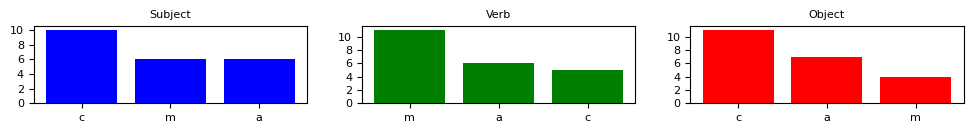

get all data abstractness tag


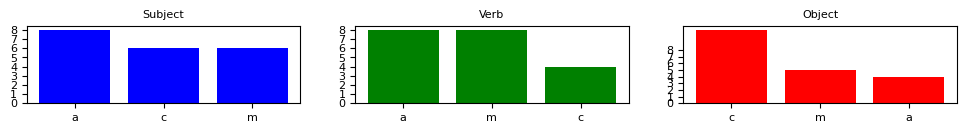

In [18]:
pap_ab.plot_ab_uni_distribution()
pap_ab2.plot_ab_uni_distribution()
# pap_ab.plot_ab_uni_distribution(0)
# pap_ab.plot_ab_uni_distribution(1)

## 4.2 bigram abstractness tag

get all data abstractness tag


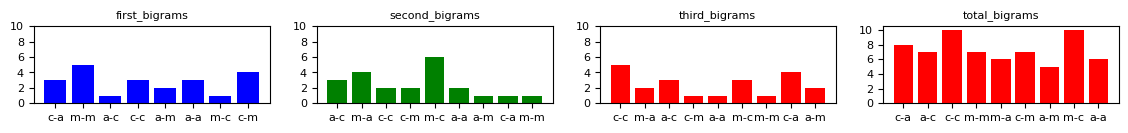

get all data abstractness tag


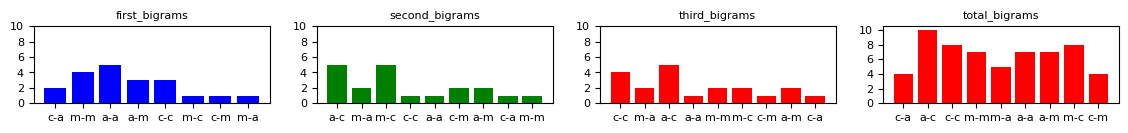

In [19]:
pap_ab. plot_ab_bi_distribution()
pap_ab2. plot_ab_bi_distribution()

## 4.3 tokens and abstractness

get all data abstractness tag


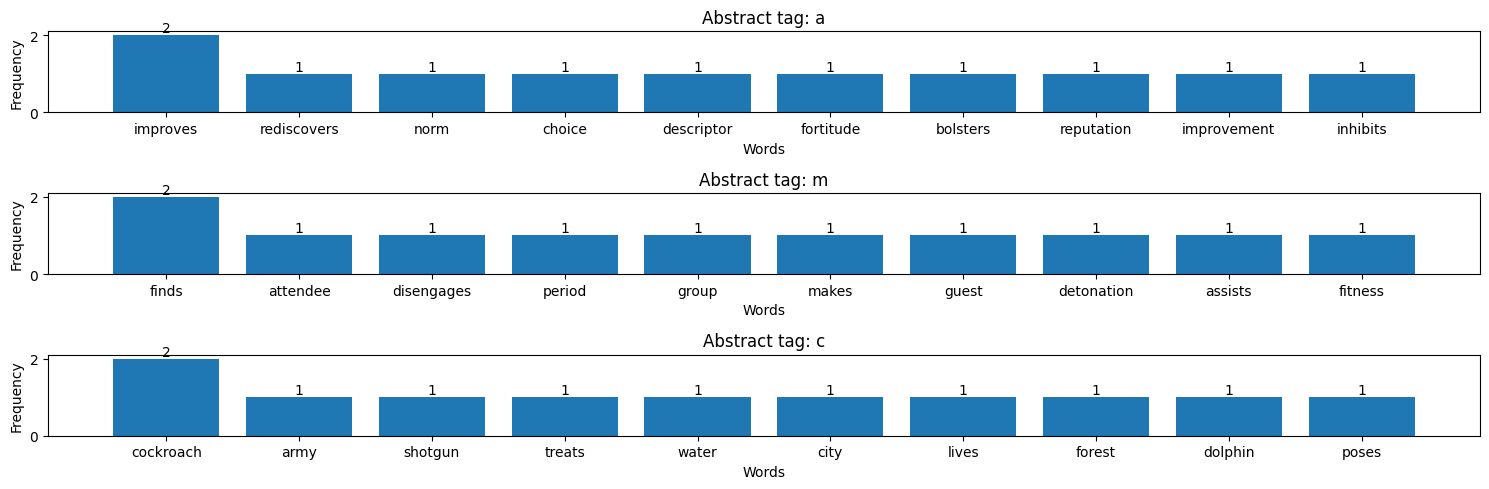

get all data abstractness tag


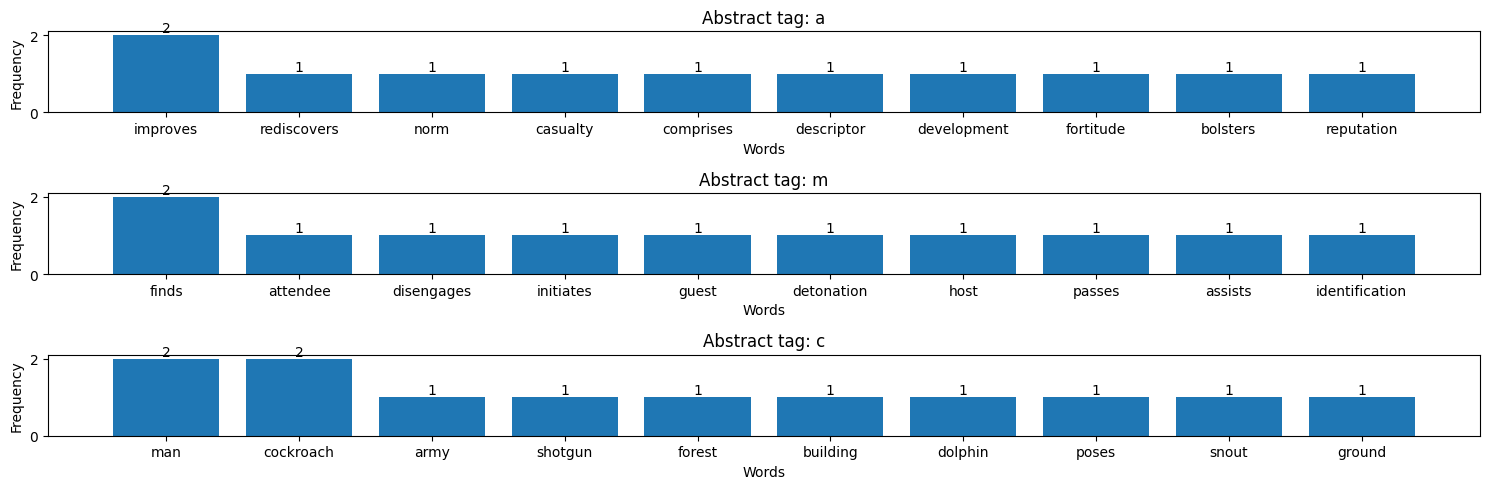

In [20]:
pap_ab.plot_ab_tokens_distribution()
pap_ab2.plot_ab_tokens_distribution()

In [21]:
pap_ab=Abstractness_wrong(pap_content)
for i in pap_ab.content:
    if 'find' in i[0]:
        print(i)
    if 'army' in i[0]:
        print(i)

get all data abstractness tag
get all data abstractness tag
get all data abstractness tag
get all data abstractness tag
['army rediscovers shotgun', 'plausible', 'c-a-c', '1']
['descriptor finds forest', 'plausible', 'a-m-c', '1']
['couple finds cockroach', 'implausible', 'm-m-c', '1']


In [22]:
pap_ab=Abstractness_wrong(pap_content)
for i in pap_ab.content:
    if i[1]=='plausible' and i[3]!='1':
        print('1.', i)
    elif i[1]=='implausible' and i[3]!='0':
        print('2.', i)

print()
pap_ab2=Abstractness_wrong(pap_content2)
for i in pap_ab2.content:
    if i[1]=='plausible' and i[3]!='1':
        print('1.', i)
    elif i[1]=='implausible' and i[3]!='0':
        print('2.', i)

get all data abstractness tag
get all data abstractness tag
get all data abstractness tag
get all data abstractness tag
1. ['choice treats water', 'plausible', 'a-c-c', 'unsure']
1. ['dolphin poses snout', 'plausible', 'c-c-c', 'unsure']
1. ['group makes barrel', 'plausible', 'm-m-c', 'unsure']
1. ['kangaroo assists roommate', 'plausible', 'c-m-c', 'unsure']
1. ['memory improves fitness', 'plausible', 'a-a-m', 'unsure']
1. ['ratio outnumbers name', 'plausible', 'a-m-m', 'unsure']
2. ['ceremony distributes book', 'implausible', 'm-m-c', '1']
2. ['couple finds cockroach', 'implausible', 'm-m-c', '1']
2. ['dollar receives sheet', 'implausible', 'c-m-c', '1']
2. ['mule contains tradition', 'implausible', 'c-m-a', 'unsure']

get all data abstractness tag
get all data abstractness tag
get all data abstractness tag
get all data abstractness tag
1. ['development initiates building', 'plausible', 'a-m-c', 'unsure']
1. ['dolphin poses snout', 'plausible', 'c-c-c', 'unsure']
1. ['growth implies g